# Task 3 Handwritten equation solver using CNN

### Mathematical equation solver using character and symbol recognition using image processing and CNN. 

## Author: Pratyush Srivastava
## LGM VIP SEPTEMBER 2021

In [31]:

import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import seaborn as sns

np.random.seed(2)

'load the dataset'
dataset = pd.read_csv("dataset (2).csv")

'creating label'
y = dataset["label"]

'dropping label'
X = dataset.drop(labels = ["label"], axis = 1)

'deleting dataset to reduce memory usage'
del dataset

'overview of dataset'
g = sns.countplot(y)
y.value_counts()

'Grayscale normalization to reduce the effect of illumination differences.'
X = X / 255.0

'reshaping the dataset to fit standard of a 4D tensor of shape [mini-batch size, height = 28px, width = 28px, channels = 1 due to grayscale].'
X = X.values.reshape(-1,28,28,1)

'categorical conversion of label'
y = to_categorical(y, num_classes = 14)

'90% Training and 10% Validation split'
random_seed = 2
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1 , random_state = random_seed, stratify = y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [32]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from tensorflow import keras

'creating the instance of the model'
model = Sequential()

'adding layers to the model'
#Layer: 1
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = "Same", activation = "relu", input_shape = (28, 28, 1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#Layer: 2
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "Same", activation = "relu"))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))


#fully connected layer and output
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(14, activation = "softmax"))



'Set the optimizer and annealer'
optimizer = RMSprop(lr = 0.001, rho = 0.9, epsilon = 1e-08, decay=0.0 )

model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor = "val_accuracy",
                                            patience = 3,
                                            verbose = 1,
                                            factor = 0.5,
                                            min_lr = 0.0001)


'data augmentation'
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)


'fitting the model'
epochs = 5
batch_size = 86


history = model.fit_generator(
                                datagen.flow(X_train,y_train, batch_size=batch_size),
                                epochs = epochs, #An epoch is an iteration over the entire x and y data provided
                                validation_data = (X_val,y_val), #Data on which to evaluate the loss and any model metrics at the end of each epoch. 
                                verbose = 1, #output
                                steps_per_epoch=X_train.shape[0] // batch_size,  # Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch.
                                callbacks=[learning_rate_reduction]                            
                              )
'saving the model in HDF5 binary data format'
model.save("...//model.h5")

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
896/896 [==============================] - 553s 616ms/step - loss: 0.2798 - accuracy: 0.9143 - val_loss: 0.0846 - val_accuracy: 0.9721
Epoch 2/5
896/896 [==============================] - 556s 620ms/step - loss: 0.0813 - accuracy: 0.9754 - val_loss: 0.0333 - val_accuracy: 0.9898
Epoch 3/5
896/896 [==============================] - 551s 615ms/step - loss: 0.0636 - accuracy: 0.9816 - val_loss: 0.0392 - val_accuracy: 0.9897
Epoch 4/5
896/896 [==============================] - 547s 611ms/step - loss: 0.0565 - accuracy: 0.9839 - val_loss: 0.0307 - val_accuracy: 0.9924
Epoch 5/5
896/896 [==============================] - 547s 611ms/step - loss: 0.0564 - accuracy: 0.9841 - val_loss: 0.0408 - val_accuracy: 0.9918


In [34]:
from PIL import Image
from itertools import groupby

'loading image in grayscale'
image = Image.open("testing.png").convert("L")

'resizing to 28 height pixels'
w = image.size[0]
h = image.size[1]
r = w / h # aspect ratio
new_w = int(r * 28)
new_h = 28
new_image = image.resize((new_w, new_h))

'converting to a numpy array'
new_image_arr = np.array(new_image)

'inverting the image to make background = 0'
new_inv_image_arr = 255 - new_image_arr

'rescaling the image'
final_image_arr = new_inv_image_arr / 255.0

'splitting image array into individual element arrays using non zero columns'
m = final_image_arr.any(0)
out = [final_image_arr[:,[*g]] for k, g in groupby(np.arange(len(m)), lambda x: m[x] != 0) if k]


'''
iterating through the element arrays to resize them to match input 
criteria of the model = [mini_batch_size, height, width, channels]
'''
num_of_elements = len(out)
elements_list = []
for x in range(0, num_of_elements):
    img = out[x]
    
    #adding 0 value columns as fillers
    width = img.shape[1]
    filler = (final_image_arr.shape[0] - width) / 2
    
    if filler.is_integer() == False:    #odd number of filler columns
        filler_l = int(filler)
        filler_r = int(filler) + 1
    else:                               #even number of filler columns
        filler_l = int(filler)
        filler_r = int(filler)
    
    arr_l = np.zeros((final_image_arr.shape[0], filler_l)) #left fillers
    arr_r = np.zeros((final_image_arr.shape[0], filler_r)) #right fillers
    
    #concatinating the left and right fillers
    help_ = np.concatenate((arr_l, img), axis= 1)
    element_arr = np.concatenate((help_, arr_r), axis= 1)
    
    element_arr.resize(28, 28, 1) #resize array 2d to 3d
    #storing all elements in a list
    elements_list.append(element_arr)
elements_array = np.array(elements_list)
'reshaping to fit model input criteria'
elements_array = elements_array.reshape(-1, 28, 28, 1)
'predicting using the created model'
model = keras.models.load_model("...//model.h5")
elements_pred =  model.predict(elements_array)
elements_pred = np.argmax(elements_pred, axis = 1)

In [35]:
elements_array.shape

(14, 28, 28, 1)

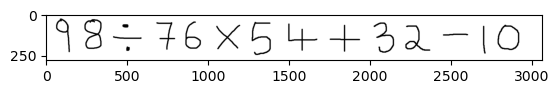

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("testing.png")
plt.imshow(image)
plt.show()

In [36]:
print(elements_pred)

[ 9  8 10  7  6 13  5  4 11  3  2 12  1  0]


In [37]:
def math_expression_generator(arr):
    
    op = {
              10,   # = "/"
              11,   # = "+"
              12,   # = "-"
              13    # = "*"
                  }   
    
    m_exp = []
    temp = []
        
    'creating a list separating all elements'
    for item in arr:
        if item not in op:
            temp.append(item)
        else:
            m_exp.append(temp)
            m_exp.append(item)
            temp = []
    if temp:
        m_exp.append(temp)
        
    'converting the elements to numbers and operators'
    i = 0
    num = 0
    for item in m_exp:
        if type(item) == list:
            if not item:
                m_exp[i] = ""
                i = i + 1
            else:
                num_len = len(item)
                for digit in item:
                    num_len = num_len - 1
                    num = num + ((10 ** num_len) * digit)
                m_exp[i] = str(num)
                num = 0
                i = i + 1
        else:
            m_exp[i] = str(item)
            m_exp[i] = m_exp[i].replace("10","/")
            m_exp[i] = m_exp[i].replace("11","+")
            m_exp[i] = m_exp[i].replace("12","-")
            m_exp[i] = m_exp[i].replace("13","*")
            
            i = i + 1
    
    
    'joining the list of strings to create the mathematical expression'
    separator = ' '
    m_exp_str = separator.join(m_exp)
    
    return (m_exp_str)

'creating the mathematical expression'
m_exp_str = math_expression_generator(elements_pred)

'calculating the mathematical expression using eval()'
while True:
    try:
        answer = eval(m_exp_str)    #evaluating the answer
        answer = round(answer, 2)
        equation  = m_exp_str + " = " + str(answer)
        print(equation)   #printing the equation
        break

    except SyntaxError:
        print("Invalid predicted expression!!")
        print("Following is the predicted expression:")
        print(m_exp_str)
        break


98 / 76 * 54 + 32 - 10 = 91.63


In [38]:
m_exp_str = math_expression_generator(elements_pred)

In [39]:
print(m_exp_str)

98 / 76 * 54 + 32 - 10


In [40]:
print(equation)

98 / 76 * 54 + 32 - 10 = 91.63


In [41]:
def model_update(X, y, model):
    
    from tensorflow.keras.optimizers import RMSprop
    from keras.utils.np_utils import to_categorical
    from keras.preprocessing.image import ImageDataGenerator
      
    y = to_categorical(y, num_classes = 14)
    
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    datagen.fit(X)

    #freezing layers 0 to 4
    for l in range(0, 5):
        model.layers[l].trainable = False

    optimizer = RMSprop(lr = 0.0001, rho = 0.9, epsilon = 1e-08, decay=0.0 )
    model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])
        
    history = model.fit(
                            datagen.flow(X,y, batch_size = 1),
                            epochs = 10,
                            verbose = 1
                        )
    
    'saving the updated model'
    model.save("...//updated_model.h5") 
    
    print("Model has been updated!!")
#++++++++++++++++++++++++++++++++++++++++++++++++++++++



'taking user feedback regarding prediction'
feedback = input("Was the expression correctly predicted? (y/n): ")

'if no then, asking user for correct expression'
if feedback == "n":
    corr_ans_str = str(input("The correct expression is: "))
    corr_ans_str = corr_ans_str.replace(" ", "")
    
    def feedback_conversion(correct_ans_str):
        return [char for char in correct_ans_str]
    
    corr_ans_list = feedback_conversion(corr_ans_str)
    dic = {"/":"10", "+": "11", "-": "12", "*": "13"}  
    corr_ans_list = [dic.get(n, n) for n in corr_ans_list]
    corr_ans_arr= np.array(list(map(int, corr_ans_list)))
    print(corr_ans_arr.shape)
    
    'comparing the expressions and getting the indexes of the wrong predictioned elements'
    wrong_pred_indices = []
    
    for i in range(len(corr_ans_arr)):
        if corr_ans_arr[i] == elements_pred[i]:
            pass
        else:
            wrong_pred_indices.append(i)
    
    'picking up the wrongly predicted elements'
    X = elements_array[[wrong_pred_indices]]
    
    'reshaping to fit model input standards'
    if len(X.shape) == 3:
        X = X.reshape(-1, 28, 28, 1)
    else:
        pass
    
    'the correct answers as labels'
    y = corr_ans_arr[[wrong_pred_indices]]
    
    'updating the model'
    model_update(X, y, model)    
    
    
else:
    'if expression is correctly predicted'
    pass


Was the expression correctly predicted? (y/n): y
